In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.datasets import california_housing

In [9]:
calihousing = california_housing.fetch_california_housing()

In [13]:
data = pd.DataFrame(calihousing.data,columns=calihousing.feature_names)
target = calihousing.target

In [20]:
adjdata = data[['MedInc','AveBedrms','AveRooms']]


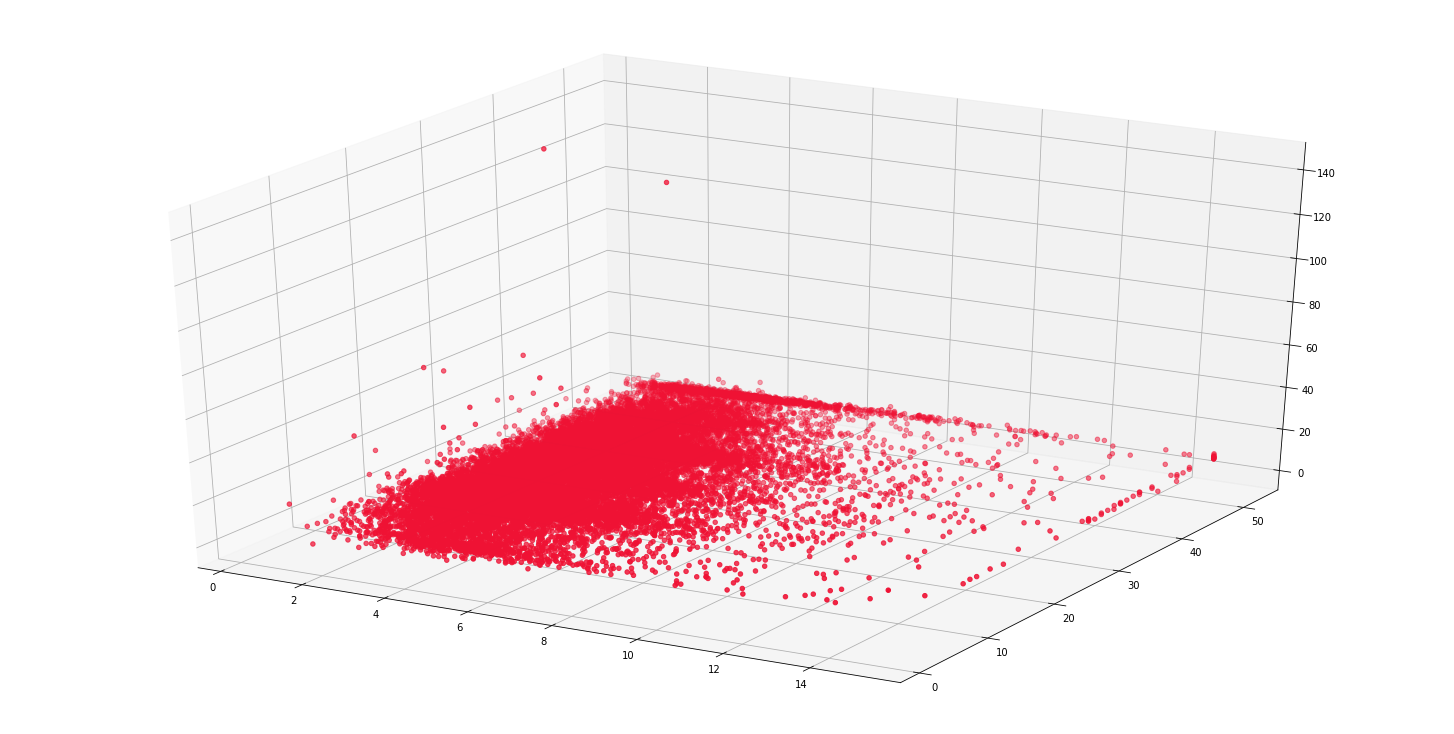

In [22]:
MedInc = adjdata['MedInc'].values
AveBedrms = adjdata['AveBedrms'].values
AveRooms = adjdata['AveRooms'].values



# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(MedInc, HouseAge, AveRooms, color='#ef1234')
plt.show()

In [65]:
def Generate_Features_AndIntercept(data):
    
    ##we will add a constant to our dataset
    x0 = np.ones(len(data.iloc[:,0]))
    data['constant'] = x0
    
    X = np.array(data)
    B = np.array(np.zeros(data.shape[1]))
    
    print(B)
    return (X,B)

In [66]:
X,B = Generate_Features_AndIntercept(adjdata)

[0. 0. 0. 0.]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [67]:
def cost_function(X,Y,B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [68]:
initial_cost = cost_function(X,target,B)
initial_cost

2.8052415994936264

In [132]:
def gradient_descent(X,Y,B,alpha,iterations):
    lossy = []
    cost_history =[0] * iterations
    
    m = len(target)
    
    Y=target

    
    for iteration in range(iterations):

        h = X.dot(B)

        loss = h-Y
       
        gradient = X.T.dot(loss) / m

        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        
        
        lossy.append(tuple([iteration,cost]))
        cost_history[iteration] = cost
        
    steploss = pd.DataFrame(lossy,columns=['step','loss'])
    return B, cost_history,steploss

In [156]:
coefficients, cost_history, steploss= gradient_descent(X, target, B, 0.001, 5000)

In [151]:
import seaborn as sns

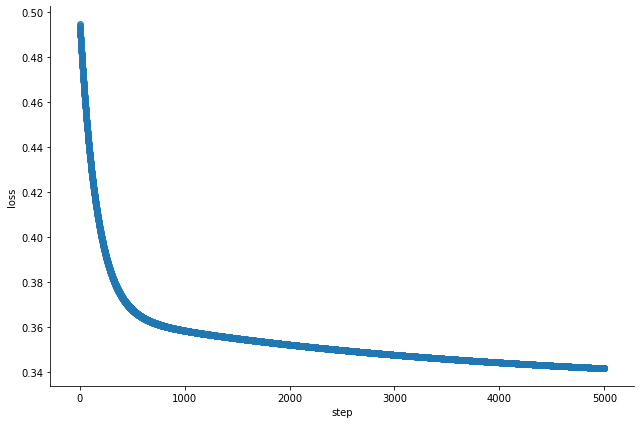

In [154]:

sns.lmplot(data=steploss,x='step',y='loss',fit_reg=False,size=6,aspect=1.5)

In [159]:
def predict(X,coefficients):
    prediciton = X.dot(coefficients)
    return prediciton

In [160]:
Y_pred = predict(X,coefficients)

In [161]:
Y_pred

array([4.04977815, 4.07231558, 3.47264767, ..., 1.02847756, 1.1125694 ,
       1.36311323])

In [162]:
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [163]:
r2_score(Y,Y_pred)

0.4865711215187791